<a href="https://colab.research.google.com/github/David6230/Modelo-de-clasificaci-n-de-movilidad-estudiantil/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import numpy as np

In [82]:
df = pd.read_csv("/content/movilidad_estudiantil.csv", sep="|")
df.head()

,individuo,fecha_ingreso,provincia_estudio,canton_estudio,sexo,etnia,nacionalidad,discapacidad,tipo_colegio,beca,nivel_formacion_padre,nivel_formacion_madre,numero_hermanos,anio_inicio_periodo,anio_inicio_estudio,provincia_nacimiento,instituciones_educacion_provincia,escolaridad_provincia,brecha_aceso_educacion
0,1,2016-04-18,PICHINCHA,QUITO,HOMBRE,MESTIZO,ECUADOR,NINGUNA,FISCAL,NINGUNA,NO_SABE,NO_SABE,5.0,2016,2016,CARCHI,2.0,"9,3",-1.366
1,2,2016-04-18,PICHINCHA,QUITO,MUJER,MESTIZO,ECUADOR,NINGUNA,FISCAL,NINGUNA,NO_SABE,NO_SABE,4.0,2016,2016,PICHINCHA,19.0,"11,3",-24.605
2,3,2016-04-18,PICHINCHA,QUITO,HOMBRE,MESTIZO,ECUADOR,NINGUNA,FISCAL,NINGUNA,NO_SABE,NO_SABE,5.0,2016,2016,PICHINCHA,19.0,"11,3",-24.605
3,4,2016-04-18,PICHINCHA,QUITO,HOMBRE,MESTIZO,ECUADOR,NINGUNA,PARTICULAR,NINGUNA,NO_SABE,NO_SABE,1.0,2016,2016,TUNGURAHUA,4.0,"9,7",-2.520
4,5,2016-04-18,PICHINCHA,QUITO,HOMBRE,MESTIZO,ECUADOR,NINGUNA,FISCAL,NINGUNA,NO_SABE,NO_SABE,4.0,2016,2016,PICHINCHA,19.0,"11,3",-24.605


# Análisis preliminar de la base de datos

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130455 entries, 0 to 130454
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   individuo                          130455 non-null  int64  
 1   fecha_ingreso                      130455 non-null  object 
 2   provincia_estudio                  130455 non-null  object 
 3   canton_estudio                     130455 non-null  object 
 4   sexo                               130455 non-null  object 
 5   etnia                              130455 non-null  object 
 6   nacionalidad                       130455 non-null  object 
 7   discapacidad                       130455 non-null  object 
 8   tipo_colegio                       130455 non-null  object 
 9   beca                               130455 non-null  object 
 10  nivel_formacion_padre              130354 non-null  object 
 11  nivel_formacion_madre              1303

In [84]:
df.describe().round(2)

,individuo,numero_hermanos,anio_inicio_periodo,anio_inicio_estudio,instituciones_educacion_provincia,brecha_aceso_educacion
count,130455.00,1.303540e+05,130455.0,130455.0,128780.00,130455.00
mean,65228.00,4.018193e+04,2016.0,2016.0,10.80,-35.75
std,37659.26,6.143912e+06,0.0,0.0,7.08,167.93
min,1.00,0.000000e+00,2016.0,2016.0,1.00,-852.00
25%,32614.50,1.000000e+00,2016.0,2016.0,3.00,-24.60
50%,65228.00,2.000000e+00,2016.0,2016.0,9.00,-9.02
75%,97841.50,4.000000e+00,2016.0,2016.0,18.00,-2.52
max,130455.00,9.986567e+08,2016.0,2016.0,19.00,883.00


In [85]:
# Análisis de duplicados

df.duplicated().sum()

0

Se puede observar a primera instancia que la base de datos no cuenta con registros duplicados.

In [86]:
df.isna().sum()

individuo                               0
fecha_ingreso                           0
provincia_estudio                       0
canton_estudio                          0
sexo                                    0
etnia                                   0
nacionalidad                            0
discapacidad                            0
tipo_colegio                            0
beca                                    0
nivel_formacion_padre                 101
nivel_formacion_madre                 101
numero_hermanos                       101
anio_inicio_periodo                     0
anio_inicio_estudio                     0
provincia_nacimiento                    0
instituciones_educacion_provincia    1675
escolaridad_provincia                   0
brecha_aceso_educacion                  0
dtype: int64

Se puede observar que la base de datos cuenta con registros vacíos en el nivel de formación del padre, la madre, el número de hermanos y en el número de instituciones por provincia.

In [87]:
a_1 = list(df.columns)

for x in range(2,19):
    print(df[a_1[x]].value_counts())

PICHINCHA                         28098
GUAYAS                            26258
LOJA                              16671
MANABI                            13831
AZUAY                             10412
CHIMBORAZO                         5908
TUNGURAHUA                         4739
COTOPAXI                           4647
LOS RIOS                           3627
ESMERALDAS                         3242
IMBABURA                           2686
EL ORO                             2247
SANTO DOMINGO DE LOS TSACHILAS     1470
SANTA ELENA                        1438
BOLIVAR                            1399
PASTAZA                            1228
CARCHI                             1226
CAÑAR                              1040
NAPO                                 91
MORONA SANTIAGO                      90
GALAPAGOS                            74
ORELLANA                             33
Name: provincia_estudio, dtype: int64
QUITO                    26374
GUAYAQUIL                23267
LOJA                

Se puede observar que existen registros con NAN's, los cuales deberan ser tratados para poder obtener una base dedatos balanceada. Además, como se puede observar se debe realizar un tratamiento para la variable número de hermanos que al parecer existe un mal registro de los mismo, por lo que se debe decidir el tratamiento de esa variable.

## Selección de variables a trabajar

Se procede a eliminar las siguientes variables:

Individio: Ya que solo es una variable que determinar un secuencia

Nivel de formación de la madre: Ya que se tiene el nivel de formación del padre, podría causar multicolinealidad.

Fecha de ingreso: Ya que se está trabajando con una base de datos del año 2016, y ese es el año de ingreso de todos los estudiantes, se identifica que la misma no aporta infomación adicional en el modelo.

anio_inicio_periodo = Ya que se está trabajando con una base de datos del año 2016, y ese es el año de ingreso de todos los estudiantes, se identifica que la misma no aporta infomación adicional en el modelo.

anio_inicio_estudio: Ya que se está trabajando con una base de datos del año 2016, y ese es el año de ingreso de todos los estudiantes, se identifica que la misma no aporta infomación adicional en el modelo.

In [88]:
drop_c = ["individuo","nivel_formacion_madre","fecha_ingreso","anio_inicio_periodo","anio_inicio_estudio"]
df.drop(columns=drop_c, inplace= True)
df.columns

Index(['provincia_estudio', 'canton_estudio', 'sexo', 'etnia', 'nacionalidad',
       'discapacidad', 'tipo_colegio', 'beca', 'nivel_formacion_padre',
       'numero_hermanos', 'provincia_nacimiento',
       'instituciones_educacion_provincia', 'escolaridad_provincia',
       'brecha_aceso_educacion'],
      dtype='object')

In [89]:
df.shape

(130455, 14)

Finalemente, la base de datos de trabajo quedó con 130455 registros y 14 características.

# Imputación a variable con NaN's

Por cuestión de una posible multicolinealidad, se decide utilizar solo un nivel de formación de los padres, por lo que se va a eliminar el nivel de formación de la madre.

In [90]:
df["nivel_formacion_padre"].value_counts()

NO_REGISTRA                             45014
NO_SABE                                 35647
EDUCACION_MEDIA                         13898
NINGUNO                                 12392
EDUCACION_BASICA                        11505
SUPERIOR_UNIVERSITARIA_COMPLETA          6802
SUPERIOR_NO_UNIVERSITARIA_COMPLETA       1665
SUPERIOR_UNIVERSITARIA_INCOMPLETA        1491
POSGRADO_MAESTRIA                        1008
SUPERIOR_NO_UNIVERSITARIA_INCOMPLETA      416
POSGRADO_PHD                              158
CENTRO_ALFABETIZACION                     154
ESPECIALIDAD                               88
DIPLOMADO                                  56
JARDIN_INFANTES                            45
POSGRADO_ESPECIALIDAD_AREA_SALUD           15
Name: nivel_formacion_padre, dtype: int64

Cómo se puede observar, las variables que más se repiten son: No registra y no sabe, pero para efectos de tratamiento de iformación para obtener la moda no se considerara esas dos categorías.

In [91]:
df_1 = df[(df["nivel_formacion_padre"] != "NO_REGISTRA") & (df["nivel_formacion_padre"] != "NO_SABE")]
df_1["nivel_formacion_padre"].value_counts()

EDUCACION_MEDIA                         13898
NINGUNO                                 12392
EDUCACION_BASICA                        11505
SUPERIOR_UNIVERSITARIA_COMPLETA          6802
SUPERIOR_NO_UNIVERSITARIA_COMPLETA       1665
SUPERIOR_UNIVERSITARIA_INCOMPLETA        1491
POSGRADO_MAESTRIA                        1008
SUPERIOR_NO_UNIVERSITARIA_INCOMPLETA      416
POSGRADO_PHD                              158
CENTRO_ALFABETIZACION                     154
ESPECIALIDAD                               88
DIPLOMADO                                  56
JARDIN_INFANTES                            45
POSGRADO_ESPECIALIDAD_AREA_SALUD           15
Name: nivel_formacion_padre, dtype: int64

In [92]:
moda = df_1["nivel_formacion_padre"].mode()[0]
moda

'EDUCACION_MEDIA'

In [93]:
# Imputación en el nivel de formación del padre

df["nivel_formacion_padre"].fillna(moda, inplace = True)
df.nunique()

provincia_estudio                    22
canton_estudio                       45
sexo                                  2
etnia                                 9
nacionalidad                         48
discapacidad                          7
tipo_colegio                          6
beca                                  5
nivel_formacion_padre                16
numero_hermanos                      42
provincia_nacimiento                 24
instituciones_educacion_provincia     9
escolaridad_provincia                18
brecha_aceso_educacion               24
dtype: int64

## Variables NAN's en el número de instituciones por provincia

En esta variable solo se reemplazará con el valor de cero, ya que en la provincia de Sucumbíos y Zamora, no existen Instituciones de Educación

In [94]:
a_1 = df[["provincia_nacimiento","instituciones_educacion_provincia"]]
a_1.value_counts(dropna=False)

provincia_nacimiento            instituciones_educacion_provincia
PICHINCHA                       19.0                                 31093
GUAYAS                          18.0                                 25132
MANABI                          9.0                                  14139
AZUAY                           5.0                                   8790
EL ORO                          3.0                                   5602
TUNGURAHUA                      4.0                                   5583
LOJA                            3.0                                   4746
CHIMBORAZO                      3.0                                   4664
ESMERALDAS                      3.0                                   4622
LOS RIOS                        7.0                                   4298
COTOPAXI                        3.0                                   3876
IMBABURA                        5.0                                   3798
CAÑAR                           2.

In [95]:
df["instituciones_educacion_provincia"] = df["instituciones_educacion_provincia"].apply(lambda x: 0 if pd.isnull(x) else x)
a_1 = df[["provincia_nacimiento","instituciones_educacion_provincia"]]
a_1.value_counts(dropna=False)

provincia_nacimiento            instituciones_educacion_provincia
PICHINCHA                       19.0                                 31093
GUAYAS                          18.0                                 25132
MANABI                          9.0                                  14139
AZUAY                           5.0                                   8790
EL ORO                          3.0                                   5602
TUNGURAHUA                      4.0                                   5583
LOJA                            3.0                                   4746
CHIMBORAZO                      3.0                                   4664
ESMERALDAS                      3.0                                   4622
LOS RIOS                        7.0                                   4298
COTOPAXI                        3.0                                   3876
IMBABURA                        5.0                                   3798
CAÑAR                           2.

# Tratamiento variable nacionalidad

In [96]:
df["nacionalidad"].value_counts

<bound method IndexOpsMixin.value_counts of 0         ECUADOR
1         ECUADOR
2         ECUADOR
3         ECUADOR
4         ECUADOR
           ...   
130450    ECUADOR
130451    ECUADOR
130452    ECUADOR
130453    ECUADOR
130454    ECUADOR
Name: nacionalidad, Length: 130455, dtype: object>

In [97]:
df["nacionalidad"] = df["nacionalidad"].apply(lambda x:"nacional" if x == "ECUADOR" else "extranjero")
df["nacionalidad"].value_counts


<bound method IndexOpsMixin.value_counts of 0         nacional
1         nacional
2         nacional
3         nacional
4         nacional
            ...   
130450    nacional
130451    nacional
130452    nacional
130453    nacional
130454    nacional
Name: nacionalidad, Length: 130455, dtype: object>

## Tratamiento para la variable número de hermanos

Para realizar el tratamiento de la variable número de hermanos, primero analizaremos sus resumen estadístico y analizar la distribución de los datos y de exístir datos atípicos, saber que se puede realizar.



In [98]:
df["numero_hermanos"].describe().round(2).apply('{:.2f}'.format)

count       130354.00
mean         40181.93
std        6143911.82
min              0.00
25%              1.00
50%              2.00
75%              4.00
max      998656710.00
Name: numero_hermanos, dtype: object

Como se puede observar existe probablemente un registro con error de tipeo, por lo que se debe deciridir entre reemplazarlo o sacarlo de la muesta, para una mejor comprención, se anarizará cual es el porcentaje de registros que tiene más de 4 hermanos que es el percentil 75.  

In [99]:
df.groupby("numero_hermanos").size()

numero_hermanos
0.0            30331
1.0            32802
2.0             8608
3.0            20397
4.0            15620
5.0            12690
6.0             5421
7.0             2322
8.0             1145
9.0              485
10.0             254
11.0             125
12.0              63
13.0              24
14.0               7
15.0              12
16.0               6
17.0               3
18.0               3
19.0               3
20.0              12
21.0               1
22.0               1
23.0               1
24.0               1
25.0               1
30.0               1
35.0               1
41.0               1
52.0               1
300.0              1
600.0              1
723.0              1
800.0              1
3817425.0          1
96976982.0         1
202513081.0        1
960432169.0        1
989712306.0        1
991957061.0        1
993501442.0        1
998656710.0        1
dtype: int64

In [100]:
df["hermanos_1"] = df["numero_hermanos"].apply(lambda x:1 if x>10 else 0)
df["hermanos_1"].value_counts(normalize= True)*100

0    99.786133
1     0.213867
Name: hermanos_1, dtype: float64

Se puede observar que el número de registros con más de 10 hermanos (que ya sería un dato atípicos por el número de hermanos) representa el 0.21% de la muestra, por lo que se imputará con los valores de la mediana de la variable para no perder registros.

In [101]:
mediana = df["numero_hermanos"].median()
mediana

2.0

In [102]:
df["numero_hermanos"].fillna(mediana, inplace = True)

In [103]:
df["numero_hermanos"] = df["numero_hermanos"].apply(lambda x: mediana if x>10 else x)
df.groupby("numero_hermanos").size()

numero_hermanos
0.0     30331
1.0     32802
2.0      8988
3.0     20397
4.0     15620
5.0     12690
6.0      5421
7.0      2322
8.0      1145
9.0       485
10.0      254
dtype: int64

In [104]:
df.drop(columns="hermanos_1", inplace=True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130455 entries, 0 to 130454
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   provincia_estudio                  130455 non-null  object 
 1   canton_estudio                     130455 non-null  object 
 2   sexo                               130455 non-null  object 
 3   etnia                              130455 non-null  object 
 4   nacionalidad                       130455 non-null  object 
 5   discapacidad                       130455 non-null  object 
 6   tipo_colegio                       130455 non-null  object 
 7   beca                               130455 non-null  object 
 8   nivel_formacion_padre              130455 non-null  object 
 9   numero_hermanos                    130455 non-null  float64
 10  provincia_nacimiento               130455 non-null  object 
 11  instituciones_educacion_provincia  1304

Se puede observar que la variable "escolaridad_provincia" está en formato "object" y debe ser formato float64.

In [106]:
df["escolaridad_provincia"] = df["escolaridad_provincia"].apply(lambda x: x.replace(",", ".")).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130455 entries, 0 to 130454
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   provincia_estudio                  130455 non-null  object 
 1   canton_estudio                     130455 non-null  object 
 2   sexo                               130455 non-null  object 
 3   etnia                              130455 non-null  object 
 4   nacionalidad                       130455 non-null  object 
 5   discapacidad                       130455 non-null  object 
 6   tipo_colegio                       130455 non-null  object 
 7   beca                               130455 non-null  object 
 8   nivel_formacion_padre              130455 non-null  object 
 9   numero_hermanos                    130455 non-null  float64
 10  provincia_nacimiento               130455 non-null  object 
 11  instituciones_educacion_provincia  1304

In [107]:
df.isna().sum()

provincia_estudio                    0
canton_estudio                       0
sexo                                 0
etnia                                0
nacionalidad                         0
discapacidad                         0
tipo_colegio                         0
beca                                 0
nivel_formacion_padre                0
numero_hermanos                      0
provincia_nacimiento                 0
instituciones_educacion_provincia    0
escolaridad_provincia                0
brecha_aceso_educacion               0
dtype: int64

Ahora ya tenemos nuestra base balanceada y completa.

# Generar la variable dependiente

In [108]:
df["movilidad"] = np.where(df["provincia_estudio"] != df["provincia_nacimiento"], 1, 0)
df["movilidad"].value_counts(normalize = True)*100

0    64.804722
1    35.195278
Name: movilidad, dtype: float64

Se puede observar que al generar la variable dependiente, la misma se encuentra con un buen porcentaje de participación para ambas categorías.

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

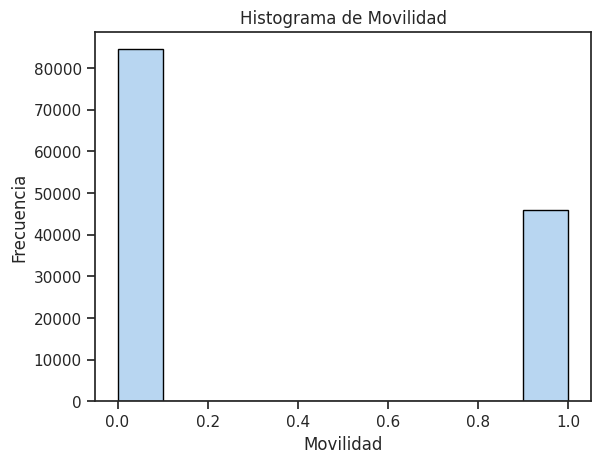

In [110]:
# Histograma de la variable a predecir

sns.set()
sns.set_style("white")
sns.set(style="ticks")
sns.set_color_codes()
ax = sns.histplot(data=df, x="movilidad", bins=10, edgecolor="black", color="#a1c9ed")
plt.xlabel("Movilidad")
plt.ylabel("Frecuencia")
plt.title("Histograma de Movilidad")
plt.ticklabel_format(useOffset=False, style="plain")
plt.grid(False)
plt.show()


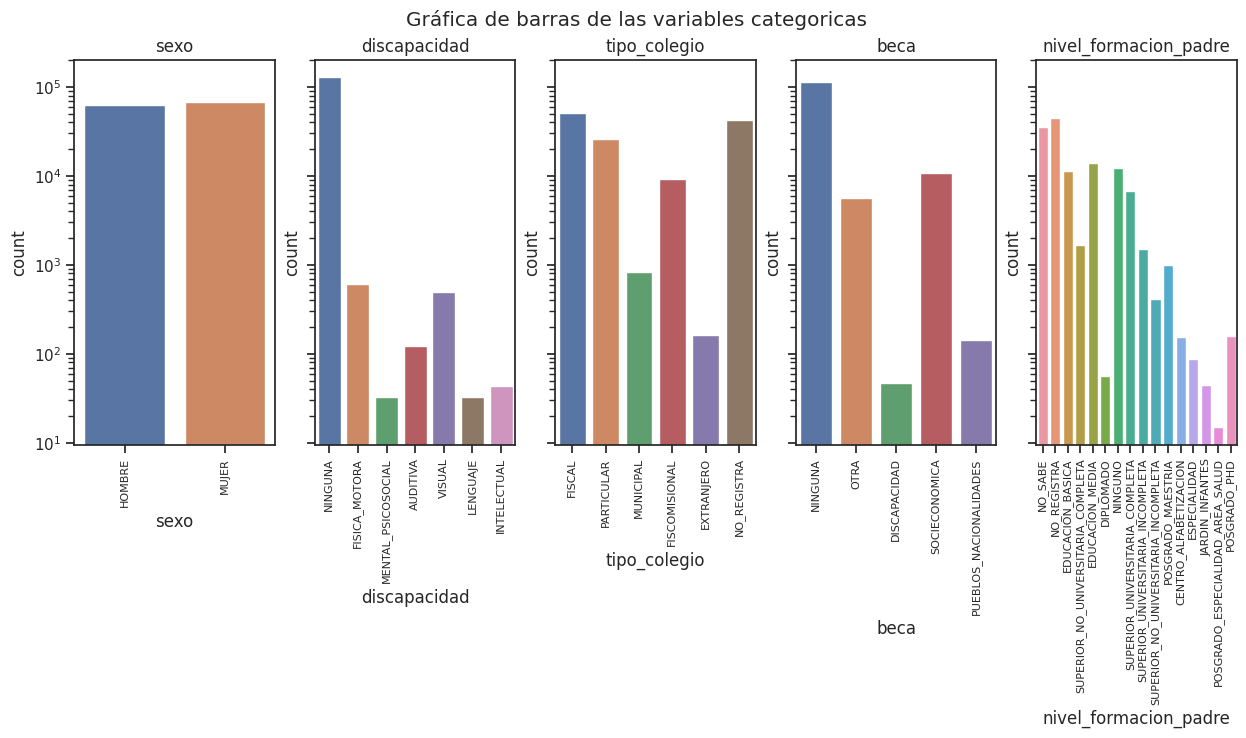

In [111]:
# Línea de código tomada de Kagle pero modificada para los fines pertinentes.

dt1 = ["sexo","discapacidad","tipo_colegio","beca","nivel_formacion_padre"]

fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle('Gráfica de barras de las variables categoricas')
column =0

for col in dt1:
    sns.countplot(ax=axes[column], x=col, data=df, log = True)
    axes[column].set_title(col)
    axes[column].tick_params(axis='x', labelsize=8)
    axes[column].tick_params(axis='x', labelrotation=90)
    column +=1

Text(0.5, 1.0, 'Diagrama de cajas de las variables cuantitativas')

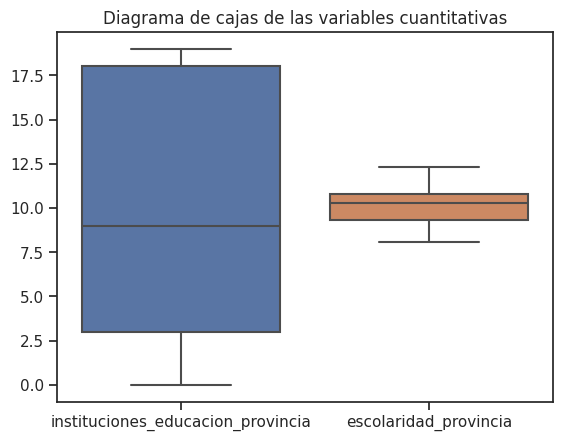

In [112]:
# Análisis a las variables cuantitativas

sns.boxplot(data=df[["instituciones_educacion_provincia", "escolaridad_provincia"]])
plt.title("Diagrama de cajas de las variables cuantitativas")

Text(0.5, 1.0, 'Diagrama de cajas de las variables cuantitativas')

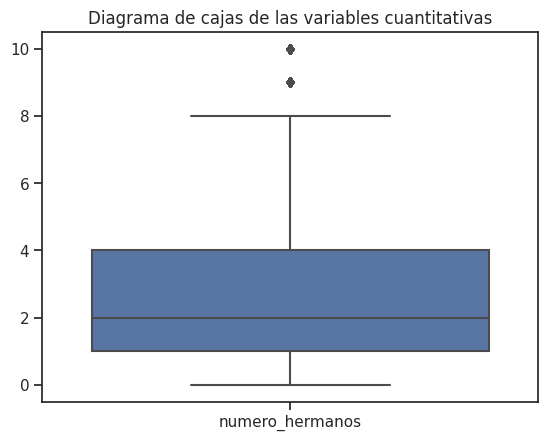

In [113]:
sns.boxplot(data=df[["numero_hermanos"]])
plt.title("Diagrama de cajas de las variables cuantitativas")

Text(0.5, 1.0, 'Diagrama de cajas de las variables cuantitativas')

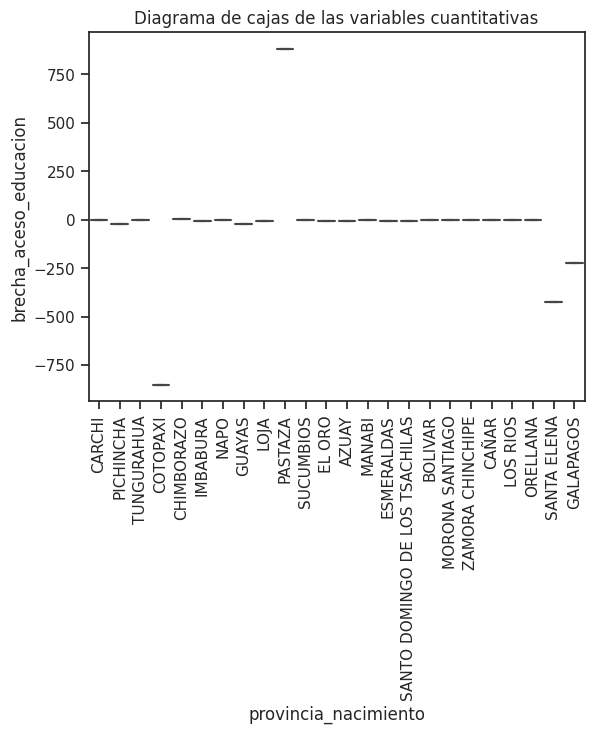

In [114]:
ax = sns.boxplot(x="provincia_nacimiento", y="brecha_aceso_educacion", data=df)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Diagrama de cajas de las variables cuantitativas")

Aunque no se puede apreciar bien el diagrama de cajas, este nos brinda información muy importante, ya que se puede apreciar que las provincias de Cotopaxi, Santa Elena y Galápagos, son las que presentan las mayores brechas de acceso, caso contrario sucede en Pastaza que tiene un superavit de cupos.

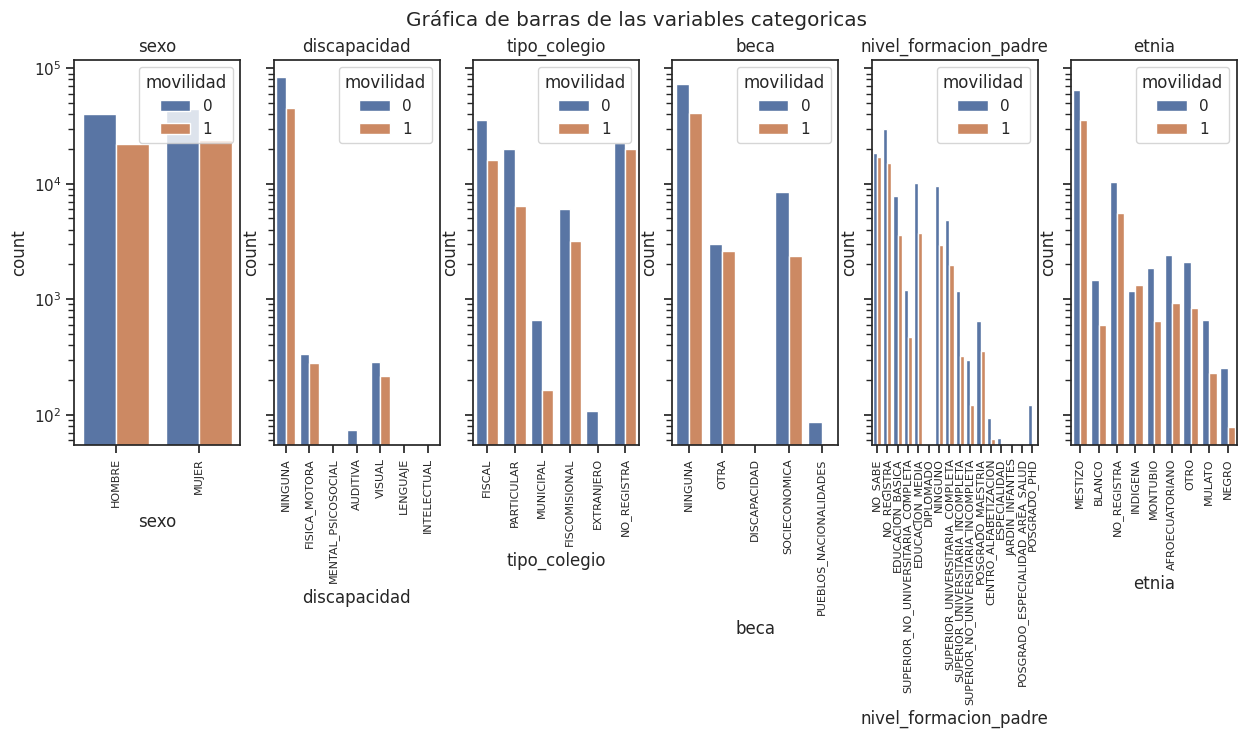

In [115]:
# Línea de código tomada de Kagle pero modificada para los fines pertinentes.

dt1 = ["sexo","discapacidad","tipo_colegio","beca","nivel_formacion_padre", "etnia"]

fig, axes = plt.subplots(1, 6, figsize=(15, 5), sharey=True)
fig.suptitle('Gráfica de barras de las variables categoricas')
column =0

for col in dt1:
    sns.countplot(ax=axes[column], x=col,hue = "movilidad", data=df, log = True)
    axes[column].set_title(col)
    axes[column].tick_params(axis='x', labelsize=8)
    axes[column].tick_params(axis='x', labelrotation=90)
    column +=1

Se puede observar en las gráficas que a nivel de sexo, se movilizan casi en igual proporción los hombres y las mujeres.

Al igual que los estudiantes que presentan una discapacidad física motora.

Resulta interesante que al analizar los estudiantes por etnia, se movilizan más los indígenas.

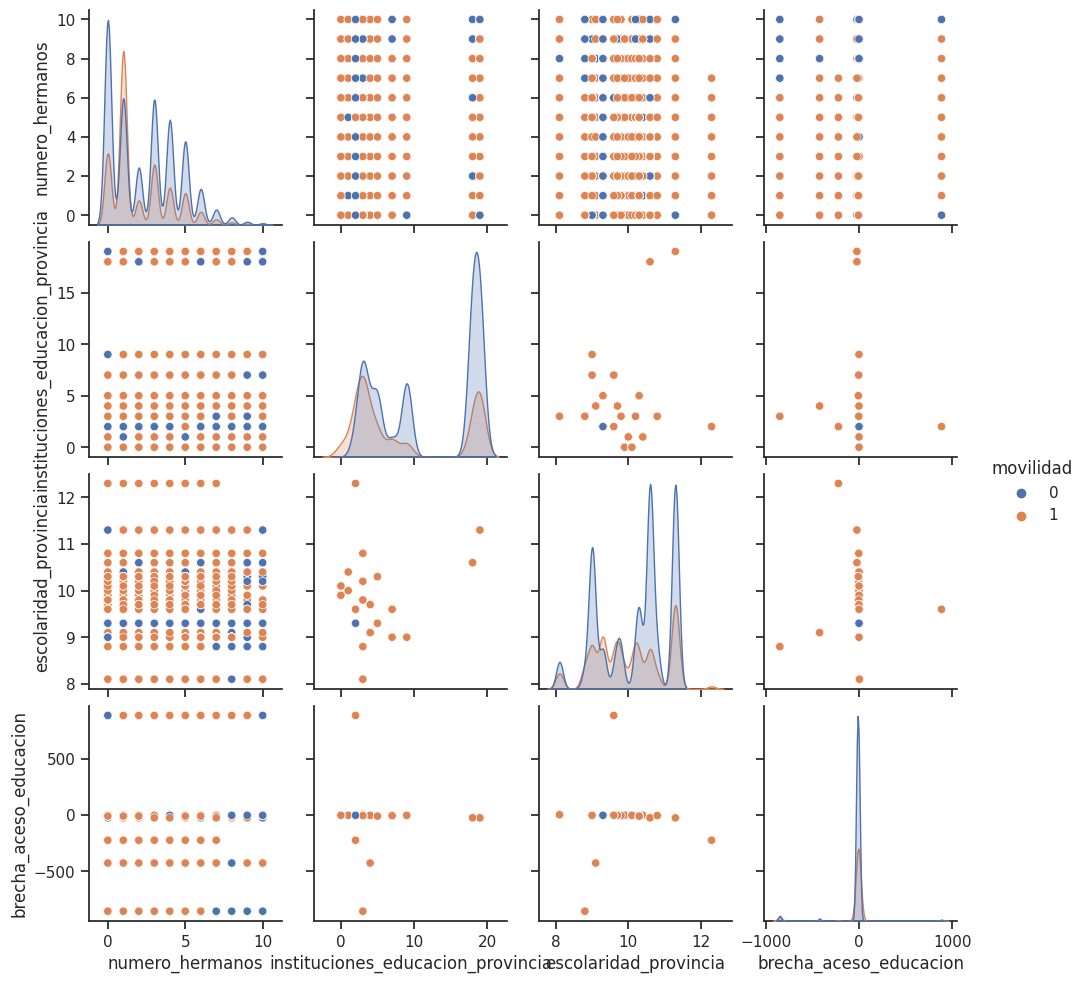

In [116]:
# Relacion nota en matematicas y la preparación

sns.pairplot(df, hue="movilidad", height = 2.5)

Se puede observar que existe una relación positiva entre las notas.

<Axes: >

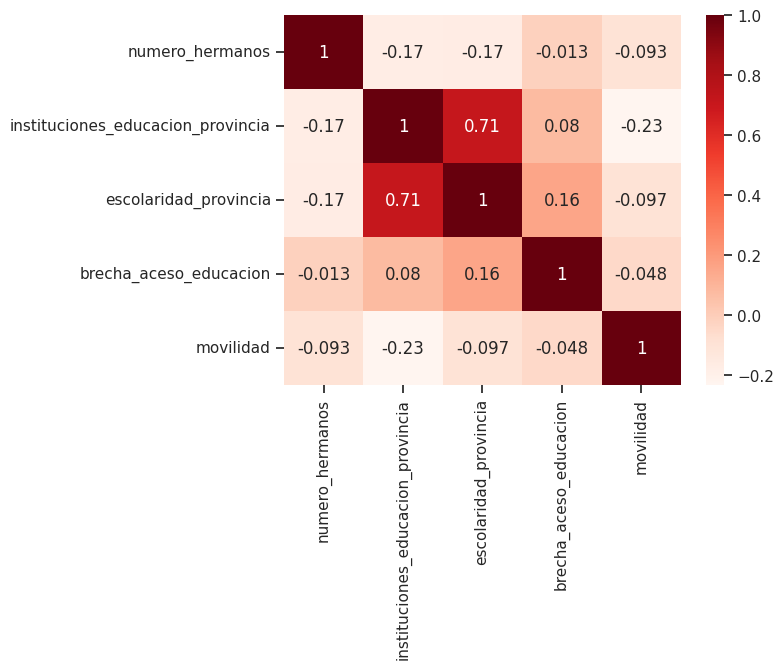

In [117]:
# Mapa de correlación
corr = df[["numero_hermanos","instituciones_educacion_provincia","escolaridad_provincia","brecha_aceso_educacion","movilidad"]].corr()
corr
sns.heatmap(corr, cmap = "Reds", annot=True)

El mapa de calor de las correlaciones nos indica que existe una baja correlación entre las variables.

Los pasos que se realizaron para el análisis y limpieza de la base de datos fueron:

1.- Análisis de duplicados
2.- Análisis de missings values
3.- Consistencia de las variables categóricas.

# Primer modelo
## Modelo de regrsión lineal

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn import set_config
set_config(display='diagram')

In [119]:
df.to_csv("datos.csv", index=False)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130455 entries, 0 to 130454
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   provincia_estudio                  130455 non-null  object 
 1   canton_estudio                     130455 non-null  object 
 2   sexo                               130455 non-null  object 
 3   etnia                              130455 non-null  object 
 4   nacionalidad                       130455 non-null  object 
 5   discapacidad                       130455 non-null  object 
 6   tipo_colegio                       130455 non-null  object 
 7   beca                               130455 non-null  object 
 8   nivel_formacion_padre              130455 non-null  object 
 9   numero_hermanos                    130455 non-null  float64
 10  provincia_nacimiento               130455 non-null  object 
 11  instituciones_educacion_provincia  1304

In [121]:
df.head(5)

,provincia_estudio,canton_estudio,sexo,etnia,nacionalidad,discapacidad,tipo_colegio,beca,nivel_formacion_padre,numero_hermanos,provincia_nacimiento,instituciones_educacion_provincia,escolaridad_provincia,brecha_aceso_educacion,movilidad
0,PICHINCHA,QUITO,HOMBRE,MESTIZO,nacional,NINGUNA,FISCAL,NINGUNA,NO_SABE,5.0,CARCHI,2.0,9.3,-1.366,1
1,PICHINCHA,QUITO,MUJER,MESTIZO,nacional,NINGUNA,FISCAL,NINGUNA,NO_SABE,4.0,PICHINCHA,19.0,11.3,-24.605,0
2,PICHINCHA,QUITO,HOMBRE,MESTIZO,nacional,NINGUNA,FISCAL,NINGUNA,NO_SABE,5.0,PICHINCHA,19.0,11.3,-24.605,0
3,PICHINCHA,QUITO,HOMBRE,MESTIZO,nacional,NINGUNA,PARTICULAR,NINGUNA,NO_SABE,1.0,TUNGURAHUA,4.0,9.7,-2.520,1
4,PICHINCHA,QUITO,HOMBRE,MESTIZO,nacional,NINGUNA,FISCAL,NINGUNA,NO_SABE,4.0,PICHINCHA,19.0,11.3,-24.605,0


In [122]:
df = df.reindex(columns=["movilidad",'sexo', 'etnia', 'nacionalidad', 'discapacidad',"provincia_nacimiento","tipo_colegio","beca","nivel_formacion_padre","numero_hermanos","instituciones_educacion_provincia","brecha_aceso_educacion"])
df.head()

,movilidad,sexo,etnia,nacionalidad,discapacidad,provincia_nacimiento,tipo_colegio,beca,nivel_formacion_padre,numero_hermanos,instituciones_educacion_provincia,brecha_aceso_educacion
0,1,HOMBRE,MESTIZO,nacional,NINGUNA,CARCHI,FISCAL,NINGUNA,NO_SABE,5.0,2.0,-1.366
1,0,MUJER,MESTIZO,nacional,NINGUNA,PICHINCHA,FISCAL,NINGUNA,NO_SABE,4.0,19.0,-24.605
2,0,HOMBRE,MESTIZO,nacional,NINGUNA,PICHINCHA,FISCAL,NINGUNA,NO_SABE,5.0,19.0,-24.605
3,1,HOMBRE,MESTIZO,nacional,NINGUNA,TUNGURAHUA,PARTICULAR,NINGUNA,NO_SABE,1.0,4.0,-2.520
4,0,HOMBRE,MESTIZO,nacional,NINGUNA,PICHINCHA,FISCAL,NINGUNA,NO_SABE,4.0,19.0,-24.605


In [123]:
df["sexo"].value_counts()

MUJER     68212
HOMBRE    62243
Name: sexo, dtype: int64

Para el modelo, no se considera la provincia de estudio, para que no cause multicolinealidad con la provincia de estudio.

In [124]:
y = df["movilidad"]
X = df.drop(columns=["movilidad"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [125]:
X_train.columns

Index(['sexo', 'etnia', 'nacionalidad', 'discapacidad', 'provincia_nacimiento',
       'tipo_colegio', 'beca', 'nivel_formacion_padre', 'numero_hermanos',
       'instituciones_educacion_provincia', 'brecha_aceso_educacion'],
      dtype='object')

In [126]:
# Primero configuramos los seleccionadores

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary', categories='auto')

numeric_pipe = make_pipeline(scaler)
categorical_pipe = make_pipeline( ohe)

number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)

# fit on train
preprocessor.fit(X_train)

# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [127]:
numeric_features = preprocessor.transformers_[0][2]
categorical_features = preprocessor.transformers_[1][2]
feature_names = list(numeric_features)
feature_names.extend(list(categorical_features))
ohe_feature_names = preprocessor.named_transformers_['pipeline-2'].named_steps['onehotencoder'].get_feature_names_out(list(X_train.select_dtypes(include=['object']).columns))
feature_names = list(X_train.select_dtypes(include=['number']).columns)
feature_names.extend(list(ohe_feature_names))
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
pd.set_option('display.max_column', None)
X_train_processed_df.head(2)

,numero_hermanos,instituciones_educacion_provincia,brecha_aceso_educacion,sexo_MUJER,etnia_AFROECUATORIANO,etnia_BLANCO,etnia_INDIGENA,etnia_MESTIZO,etnia_MONTUBIO,etnia_MULATO,etnia_NEGRO,etnia_NO_REGISTRA,etnia_OTRO,nacionalidad_nacional,discapacidad_AUDITIVA,discapacidad_FISICA_MOTORA,discapacidad_INTELECTUAL,discapacidad_LENGUAJE,discapacidad_MENTAL_PSICOSOCIAL,discapacidad_NINGUNA,discapacidad_VISUAL,provincia_nacimiento_AZUAY,provincia_nacimiento_BOLIVAR,provincia_nacimiento_CARCHI,provincia_nacimiento_CAÑAR,provincia_nacimiento_CHIMBORAZO,provincia_nacimiento_COTOPAXI,provincia_nacimiento_EL ORO,provincia_nacimiento_ESMERALDAS,provincia_nacimiento_GALAPAGOS,provincia_nacimiento_GUAYAS,provincia_nacimiento_IMBABURA,provincia_nacimiento_LOJA,provincia_nacimiento_LOS RIOS,provincia_nacimiento_MANABI,provincia_nacimiento_MORONA SANTIAGO,provincia_nacimiento_NAPO,provincia_nacimiento_ORELLANA,provincia_nacimiento_PASTAZA,provincia_nacimiento_PICHINCHA,provincia_nacimiento_SANTA ELENA,provincia_nacimiento_SANTO DOMINGO DE LOS TSACHILAS,provincia_nacimiento_SUCUMBIOS,provincia_nacimiento_TUNGURAHUA,provincia_nacimiento_ZAMORA CHINCHIPE,tipo_colegio_EXTRANJERO,tipo_colegio_FISCAL,tipo_colegio_FISCOMISIONAL,tipo_colegio_MUNICIPAL,tipo_colegio_NO_REGISTRA,tipo_colegio_PARTICULAR,beca_DISCAPACIDAD,beca_NINGUNA,beca_OTRA,beca_PUEBLOS_NACIONALIDADES,beca_SOCIECONOMICA,nivel_formacion_padre_CENTRO_ALFABETIZACION,nivel_formacion_padre_DIPLOMADO,nivel_formacion_padre_EDUCACION_BASICA,nivel_formacion_padre_EDUCACION_MEDIA,nivel_formacion_padre_ESPECIALIDAD,nivel_formacion_padre_JARDIN_INFANTES,nivel_formacion_padre_NINGUNO,nivel_formacion_padre_NO_REGISTRA,nivel_formacion_padre_NO_SABE,nivel_formacion_padre_POSGRADO_ESPECIALIDAD_AREA_SALUD,nivel_formacion_padre_POSGRADO_MAESTRIA,nivel_formacion_padre_POSGRADO_PHD,nivel_formacion_padre_SUPERIOR_NO_UNIVERSITARIA_COMPLETA,nivel_formacion_padre_SUPERIOR_NO_UNIVERSITARIA_INCOMPLETA,nivel_formacion_padre_SUPERIOR_UNIVERSITARIA_COMPLETA,nivel_formacion_padre_SUPERIOR_UNIVERSITARIA_INCOMPLETA
0,0.328232,1.168256,0.067661,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.634478,1.168256,0.067661,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
X_train_processed_df.columns.unique()

Index(['numero_hermanos', 'instituciones_educacion_provincia',
       'brecha_aceso_educacion', 'sexo_MUJER', 'etnia_AFROECUATORIANO',
       'etnia_BLANCO', 'etnia_INDIGENA', 'etnia_MESTIZO', 'etnia_MONTUBIO',
       'etnia_MULATO', 'etnia_NEGRO', 'etnia_NO_REGISTRA', 'etnia_OTRO',
       'nacionalidad_nacional', 'discapacidad_AUDITIVA',
       'discapacidad_FISICA_MOTORA', 'discapacidad_INTELECTUAL',
       'discapacidad_LENGUAJE', 'discapacidad_MENTAL_PSICOSOCIAL',
       'discapacidad_NINGUNA', 'discapacidad_VISUAL',
       'provincia_nacimiento_AZUAY', 'provincia_nacimiento_BOLIVAR',
       'provincia_nacimiento_CARCHI', 'provincia_nacimiento_CAÑAR',
       'provincia_nacimiento_CHIMBORAZO', 'provincia_nacimiento_COTOPAXI',
       'provincia_nacimiento_EL ORO', 'provincia_nacimiento_ESMERALDAS',
       'provincia_nacimiento_GALAPAGOS', 'provincia_nacimiento_GUAYAS',
       'provincia_nacimiento_IMBABURA', 'provincia_nacimiento_LOJA',
       'provincia_nacimiento_LOS RIOS', 'provin

In [129]:
X_train_processed_df.shape

(97841, 72)

In [130]:
numeric_features = preprocessor.transformers_[0][2]
categorical_features = preprocessor.transformers_[1][2]
feature_names = list(numeric_features)
feature_names.extend(list(categorical_features))
ohe_feature_names = preprocessor.named_transformers_['pipeline-2'].named_steps['onehotencoder'].get_feature_names_out(list(X_test.select_dtypes(include=['object']).columns))
feature_names = list(X_test.select_dtypes(include=['number']).columns)
feature_names.extend(list(ohe_feature_names))
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)
X_test_processed_df.head(2)

,numero_hermanos,instituciones_educacion_provincia,brecha_aceso_educacion,sexo_MUJER,etnia_AFROECUATORIANO,etnia_BLANCO,etnia_INDIGENA,etnia_MESTIZO,etnia_MONTUBIO,etnia_MULATO,etnia_NEGRO,etnia_NO_REGISTRA,etnia_OTRO,nacionalidad_nacional,discapacidad_AUDITIVA,discapacidad_FISICA_MOTORA,discapacidad_INTELECTUAL,discapacidad_LENGUAJE,discapacidad_MENTAL_PSICOSOCIAL,discapacidad_NINGUNA,discapacidad_VISUAL,provincia_nacimiento_AZUAY,provincia_nacimiento_BOLIVAR,provincia_nacimiento_CARCHI,provincia_nacimiento_CAÑAR,provincia_nacimiento_CHIMBORAZO,provincia_nacimiento_COTOPAXI,provincia_nacimiento_EL ORO,provincia_nacimiento_ESMERALDAS,provincia_nacimiento_GALAPAGOS,provincia_nacimiento_GUAYAS,provincia_nacimiento_IMBABURA,provincia_nacimiento_LOJA,provincia_nacimiento_LOS RIOS,provincia_nacimiento_MANABI,provincia_nacimiento_MORONA SANTIAGO,provincia_nacimiento_NAPO,provincia_nacimiento_ORELLANA,provincia_nacimiento_PASTAZA,provincia_nacimiento_PICHINCHA,provincia_nacimiento_SANTA ELENA,provincia_nacimiento_SANTO DOMINGO DE LOS TSACHILAS,provincia_nacimiento_SUCUMBIOS,provincia_nacimiento_TUNGURAHUA,provincia_nacimiento_ZAMORA CHINCHIPE,tipo_colegio_EXTRANJERO,tipo_colegio_FISCAL,tipo_colegio_FISCOMISIONAL,tipo_colegio_MUNICIPAL,tipo_colegio_NO_REGISTRA,tipo_colegio_PARTICULAR,beca_DISCAPACIDAD,beca_NINGUNA,beca_OTRA,beca_PUEBLOS_NACIONALIDADES,beca_SOCIECONOMICA,nivel_formacion_padre_CENTRO_ALFABETIZACION,nivel_formacion_padre_DIPLOMADO,nivel_formacion_padre_EDUCACION_BASICA,nivel_formacion_padre_EDUCACION_MEDIA,nivel_formacion_padre_ESPECIALIDAD,nivel_formacion_padre_JARDIN_INFANTES,nivel_formacion_padre_NINGUNO,nivel_formacion_padre_NO_REGISTRA,nivel_formacion_padre_NO_SABE,nivel_formacion_padre_POSGRADO_ESPECIALIDAD_AREA_SALUD,nivel_formacion_padre_POSGRADO_MAESTRIA,nivel_formacion_padre_POSGRADO_PHD,nivel_formacion_padre_SUPERIOR_NO_UNIVERSITARIA_COMPLETA,nivel_formacion_padre_SUPERIOR_NO_UNIVERSITARIA_INCOMPLETA,nivel_formacion_padre_SUPERIOR_UNIVERSITARIA_COMPLETA,nivel_formacion_padre_SUPERIOR_UNIVERSITARIA_INCOMPLETA
0,-0.153123,-1.072058,0.230435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.809588,-1.212078,0.201563,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
X_test_processed_df.shape

(32614, 72)

In [132]:
reg = LinearRegression()
reg.fit(X_train_processed_df, y_train)
train_score = reg.score(X_train_processed_df,y_train)
test_score = reg.score(X_test_processed_df,y_test)
print("El score de los datos de Trains es:",train_score)
print("El score de los datos de Tests es:",test_score)


El score de los datos de Trains es: 0.24169372947402745
El score de los datos de Tests es: 0.2371372827699637


In [133]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [134]:
# Para analizar los coeficientes
coeficientes = pd.DataFrame({"Variables": X_train_processed_df.columns ,"Coeficiente": reg.coef_})

print("La bondad de ajuste del modelo de entrenamiento es de:",round(test_score,2),"y los coeficientes de las variables son:" )
coeficientes

La bondad de ajuste del modelo de entrenamiento es de: 0.24 y los coeficientes de las variables son:


,Variables,Coeficiente
0,numero_hermanos,-1.645671e-02
1,instituciones_educacion_provincia,2.905034e+11
2,brecha_aceso_educacion,2.267495e+10
3,sexo_MUJER,-8.176835e-03
4,etnia_AFROECUATORIANO,2.409192e+10
...,...,...
67,nivel_formacion_padre_POSGRADO_PHD,4.235833e+11
68,nivel_formacion_padre_SUPERIOR_NO_UNIVERSITARI...,4.235833e+11
69,nivel_formacion_padre_SUPERIOR_NO_UNIVERSITARI...,4.235833e+11
70,nivel_formacion_padre_SUPERIOR_UNIVERSITARIA_C...,4.235833e+11


# Regresión logística

In [135]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_processed_df, y_train)
train_score_1 = logreg.score(X_train_processed_df,y_train)
test_score_1 = logreg.score(X_test_processed_df,y_test)
print("El score de los datos de Trains es:",train_score_1)
print("El score de los datos de Tests es:",test_score_1)

El score de los datos de Trains es: 0.7629112539732832
El score de los datos de Tests es: 0.7643343349481818


In [136]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Ajustar los hiper parámetros

{0.0001: 0.6525725148709143,
 0.001: 0.7214386459802539,
 0.01: 0.7639050714417122,
 0.1: 0.7645489667014166,
 1: 0.764181026553014,
 10: 0.7639970564788128,
 100: 0.7646409517385172,
 1000: 0.7646716134175507}

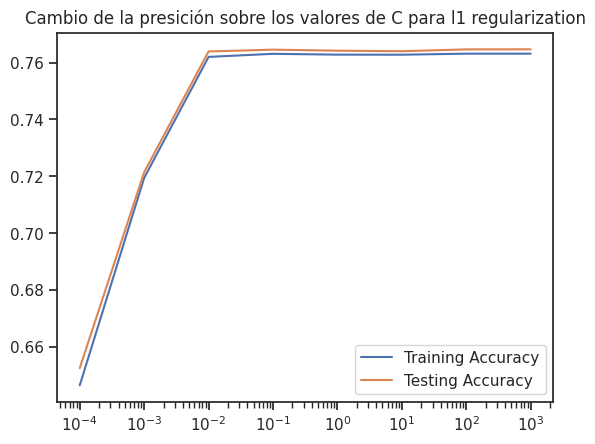

In [137]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg.fit(X_train_processed_df, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg.score(X_train_processed_df, y_train))
  test_scores.append(log_reg.score(X_test_processed_df, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Cambio de la presición sobre los valores de C para l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

Ajuste hiper párámetros

In [148]:
logreg1 = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear', penalty='l1')
logreg1.fit(X_train_processed_df, y_train)
train_score_2 = logreg.score(X_train_processed_df,y_train)
test_score_2 = logreg.score(X_test_processed_df,y_test)
print("El score de los datos de Trains es:",train_score_2)
print("El score de los datos de Tests es:",test_score_2)

El score de los datos de Trains es: 0.7629112539732832
El score de los datos de Tests es: 0.7643343349481818


# Calculen AUC y visualicen ROC

In [139]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

In [140]:
# Calculate AUC for both training and testing sets
print(f'Training AUC: {roc_auc_score(y_train, logreg1.predict_proba(X_train_processed_df)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, logreg1.predict_proba(X_test_processed_df)[:,1])}')

Training AUC: 0.780429959532849
Testing AUC: 0.7780391358312699


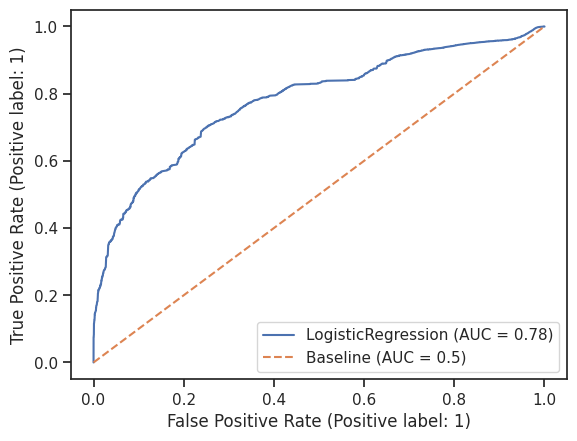

In [141]:
# Visualize the ROC curve
RocCurveDisplay.from_estimator(logreg1, X_train_processed_df, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

In [142]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

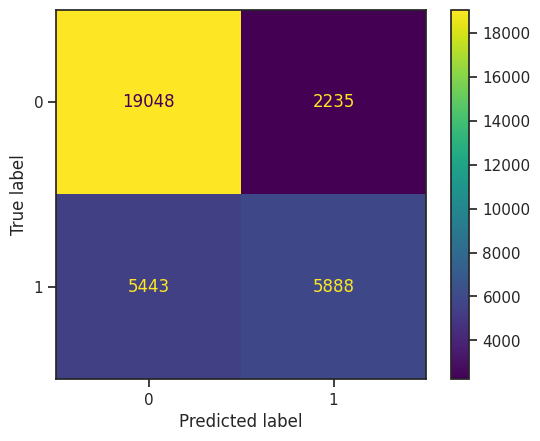

Matriz de confusión: [[19048  2235]
 [ 5443  5888]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83     21283
           1       0.72      0.52      0.61     11331

    accuracy                           0.76     32614
   macro avg       0.75      0.71      0.72     32614
weighted avg       0.76      0.76      0.75     32614



In [143]:
y_preds = logreg1.predict(X_test_processed_df)
y_true = y_test

logreg1 = confusion_matrix(y_true, y_preds)
disp_log = ConfusionMatrixDisplay(logreg1)
disp_log.plot()
acy_log =  accuracy_score(y_true, y_preds)
plt.show()
print("Matriz de confusión:",logreg1)
report= classification_report(y_true, y_preds)
print(report)

In [144]:
acy =  accuracy_score(y_true, y_preds)
rcll = recall_score(y_true, y_preds)
prec = precision_score(y_true, y_preds)


print("Métricas del modelo:")
print(f"Tasa de exactitud de: {round(acy,4)}\nUna sensibilidad de:{round(rcll,3)}\nUna presision de: {round(prec,3)}")

Métricas del modelo:
Tasa de exactitud de: 0.7646
Una sensibilidad de:0.52
Una presision de: 0.725


# Probabilidad global

In [149]:
# predecir la probabilidad estimada para cada clase en los datos de prueba
probabilidad = logreg1.predict_proba(X_test_processed_df)[:,1]

In [150]:
prob_global = np.mean(probabilidad)

In [151]:
print("La probabilidad que un estudiante de provincia se movilice a otra provincia para estudiar es:",round(prob_global,2)*100,"%")

La probabilidad que un estudiante de provincia se movilice a otra provincia para estudiar es: 35.0 %


# Carácteristicas más importantes

In [152]:
# Obtener coeficientes
coeficients = logreg1.coef_[0]

# Obtener nombres de características
feature_names = np.array(X_train_processed_df.columns)

# Obtener las k características más importantes
k = 15
top_k_indices = np.argsort(np.abs(coeficients))[::-1][:k]
top_k_features = feature_names[top_k_indices]

# Imprimir características más importantes
print("Las características más importantes son:")
for feature in top_k_features:
    print("- {}".format(feature))

Las características más importantes son:
- provincia_nacimiento_SUCUMBIOS
- provincia_nacimiento_ZAMORA CHINCHIPE
- provincia_nacimiento_NAPO
- provincia_nacimiento_GALAPAGOS
- provincia_nacimiento_ORELLANA
- provincia_nacimiento_MORONA SANTIAGO
- provincia_nacimiento_LOJA
- etnia_OTRO
- provincia_nacimiento_AZUAY
- provincia_nacimiento_SANTO DOMINGO DE LOS TSACHILAS
- tipo_colegio_NO_REGISTRA
- provincia_nacimiento_MANABI
- instituciones_educacion_provincia
- provincia_nacimiento_PICHINCHA
- provincia_nacimiento_CHIMBORAZO


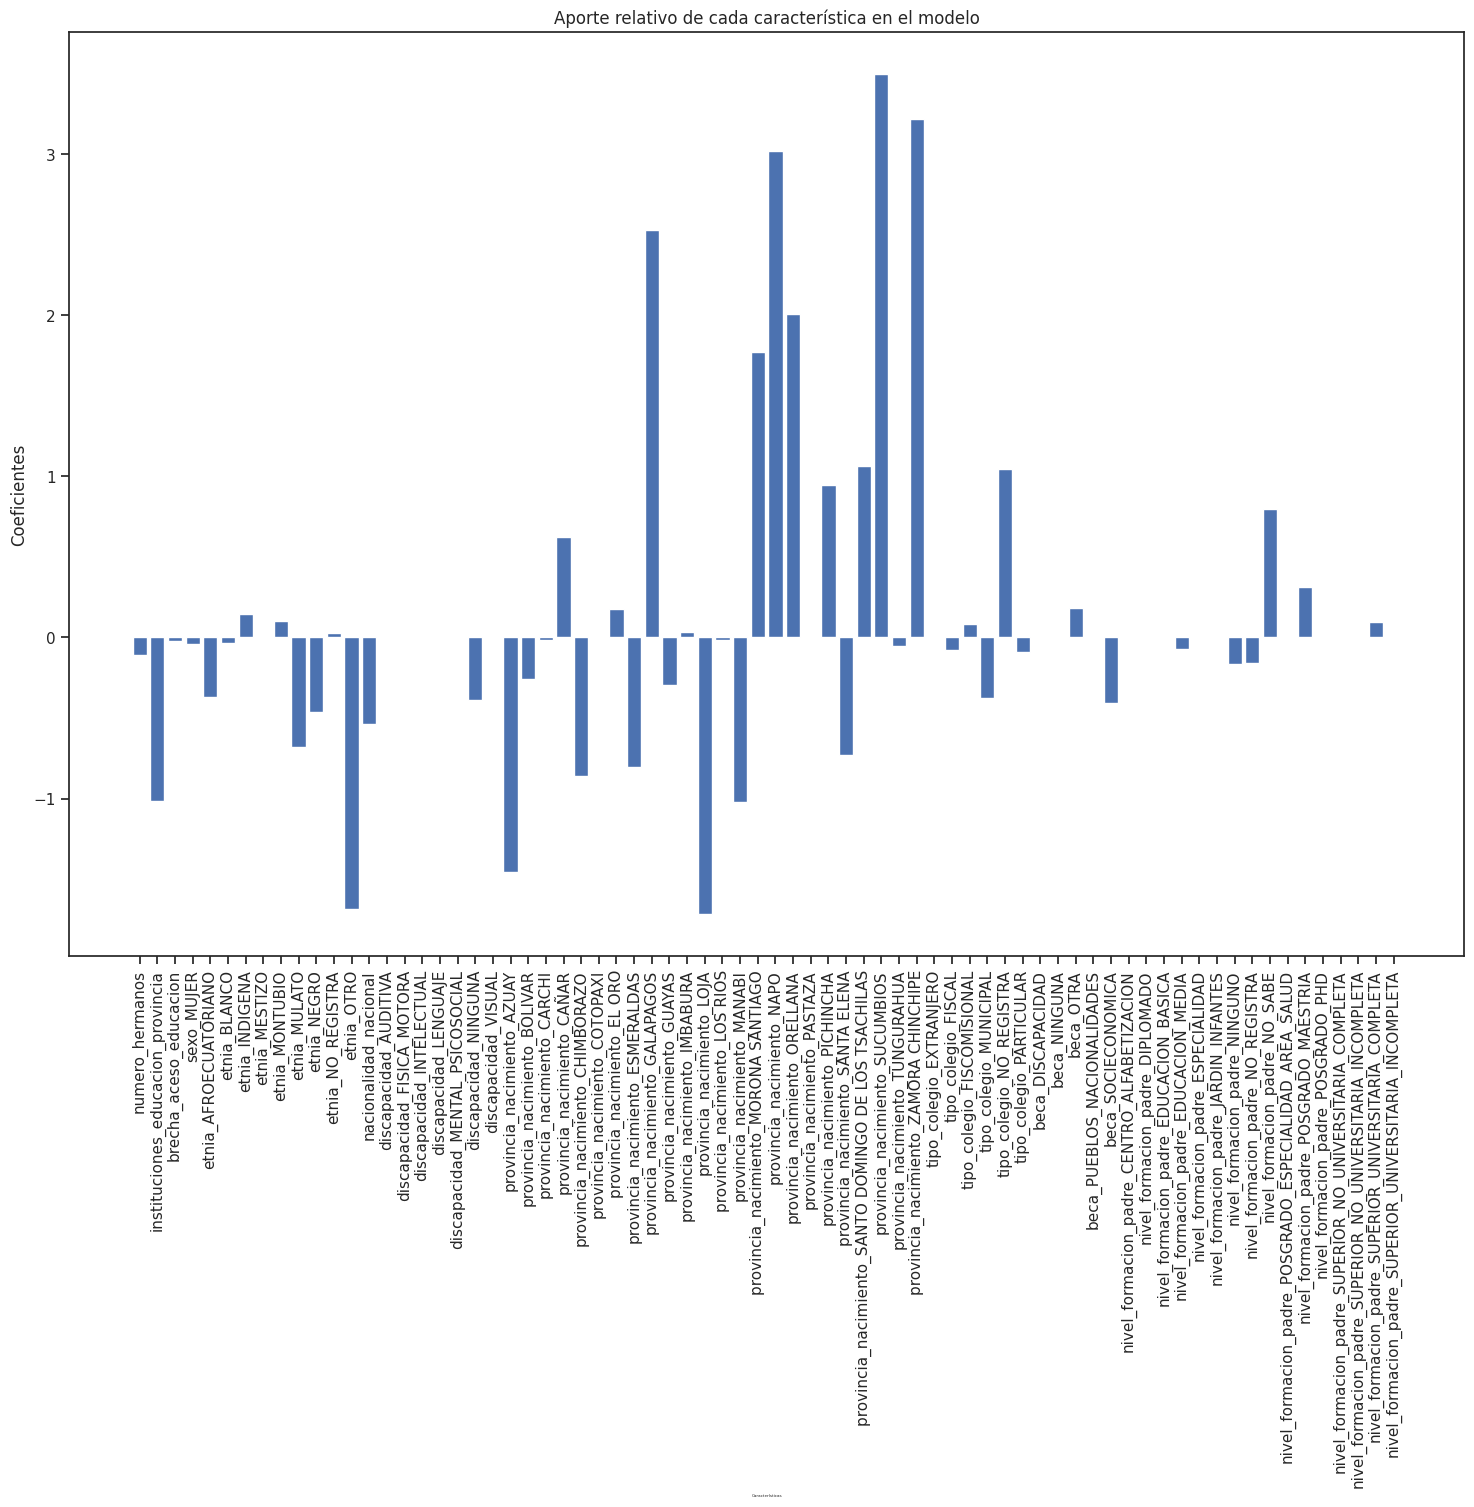

In [153]:
# Obtener coeficientes
coeficients = logreg1.coef_[0]

# Obtener nombres de características
feature_names = np.array(X_train_processed_df.columns)

# Crear gráfico de barras
plt.figure(figsize=(18,12))
plt.bar(feature_names, coeficients)
plt.xticks(rotation=90)
plt.xlabel("Características", fontsize=3)
plt.ylabel("Coeficientes")
plt.title("Aporte relativo de cada característica en el modelo")
plt.show()

## Random Forest

In [154]:
from sklearn.ensemble import RandomForestRegressor

In [155]:
# Instanciar el modelo
rf = RandomForestRegressor( n_estimators= 50 ,random_state=42)
rf.fit(X_train_processed_df,y_train)
rf.predict(X_test_processed_df)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [156]:
train_score_rf = rf.score(X_train_processed_df,y_train)
test_score_rf = rf.score(X_test_processed_df,y_test)
print("El score de los datos de Trains es:",train_score_rf)
print("El score de los datos de Tests es:",test_score_rf)

El score de los datos de Trains es: 0.7334236604867703
El score de los datos de Tests es: 0.6253766382992648


# Elije tu modelo de “producción” y justifica esta decisión

El modelo que birnda mejores resultados es el modelo de regresión logística. En los resultados de test da un scrore de 0.76519, el modelo de Ramdon Forest 0.5619 y el de la regresión lineal no brinda datos coherentes.
